<a href="https://colab.research.google.com/github/jamg-upv/CAHOS19/blob/main/WPOMgeneradorDatosCovidSerieRenave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculo de la frecuencia diaria de casos hospitalizados a partir de datos CNE RENAVE

codigo para descargar el fichero, filtrar los datos de una comunidad entre diferentes fechas, recontar el numero de casos diarios hospitalizados.



```
# Tiene formato de código
```
https://www.pythoncheatsheet.org/

## Pasos previos. librerias y  configuración

In [ ]:
# Importamos ls librería de Python que necesitaremos en este notebook

import pandas as pd  # Pandas permite manipular tablas 
import matplotlib.pyplot as plt  # Para hacer gráficas
import seaborn as sns  # Para hacer gráficas pero necesita matplotlib y deja unos graficos chulisismos 
sns.set_style('whitegrid')  # Pone una malla de fondo bastante mona para Seaborn

# Redondeamos las salidas a dos decimales
%precision %.2f

# from google.colab import drive
# drive.mount('/content/drive')

'%.2f'

In [ ]:
# datos:  casos_hosp_uci_def_sexo_edad_provres.csv: Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.
# Cargamos los datos en un DataFrame de Pandas en la variable 'data'
# si El ficheros tiene formato CSV

data = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv')
data  # Al poner el nombre de la variable se muestra su contenido por pantalla

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715495,ZA,NC,50-59,2021-03-25,0,0,0,0
715496,ZA,NC,60-69,2021-03-25,0,0,0,0
715497,ZA,NC,70-79,2021-03-25,0,0,0,0
715498,ZA,NC,80+,2021-03-25,0,0,0,0


In [ ]:
# si lo descargamos directo de la web Ç(ventaja es que con una descarga siempre está accesible y no hay que volver a descargarlo durante la sesión)
!wget https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv 
#Número de hospitalizaciones, número de ingresos en UCI y número de defunciones por sexo, edad y provincia de residencia.


--2021-03-29 10:13:08--  https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21115048 (20M) [application/octet-stream]
Saving to: ‘casos_hosp_uci_def_sexo_edad_provres.csv’

casos_hosp_uci_def_ 100%[===================>]  20.14M  3.24MB/s    in 7.5s    

2021-03-29 10:13:17 (2.67 MB/s) - ‘casos_hosp_uci_def_sexo_edad_provres.csv’ saved [21115048/21115048]



In [ ]:
# Creamos una tabla con Pandas para cada uno de los ficheros

data = pd.read_csv('casos_hosp_uci_def_sexo_edad_provres.csv')
data

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715495,ZA,NC,50-59,2021-03-25,0,0,0,0
715496,ZA,NC,60-69,2021-03-25,0,0,0,0
715497,ZA,NC,70-79,2021-03-25,0,0,0,0
715498,ZA,NC,80+,2021-03-25,0,0,0,0


In [ ]:
print (data.dtypes)


provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object


In [ ]:
resumen=data.groupby(['provincia_iso']).agg(sum)
resumen

,num_casos,num_hosp,num_uci,num_def
provincia_iso,,,,
A,143891,11776,1152,2645
AB,26969,3274,372,827
AL,48019,3240,492,720
AV,11118,1485,74,434
B,389789,31976,2540,9685
BA,46320,3251,301,890
BI,82255,8806,732,2179
BU,30228,3512,325,783
C,51847,5944,930,1071


#Filtrar los registros de una o varias provincias entre determinadas fechas
Tengo un dataframe con algunas columnas de numeros enteros, otra de fecha (aspecto de fecha pero no se si reconocida como string) y otras que son cadena o string (no lo se). quiero filtrar las filas :

 a) cuyo valor en la columna de texto coincida con alguno de los valores texto en un vector de filtro (tres o cuatro valores a seleccionar OR)
 
 b) cuyo valor en una columna de numero o fecha esté en un rango de valores de filtrado (o coincida exacto con algunos valores, como en el caso a)). Puedo pasarte el escipt de base si te parece más cómodo

¿como concatenar los valores de una columna de numeros para que queden como una "celda" con todos los numeros separados por comas ? en el fondo es como exportar a csv, pues es el resultado final (un texto de numeros separado con comas), pero para presentar esos valores en pantalla

In [ ]:

data2 = data[(data['provincia_iso'] =='V') | (data['provincia_iso'] =='A')| (data['provincia_iso'] =='CS')]
data2 = data2[(data['sexo'] =='H') | (data['sexo'] =='M')]
data2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [ ]:
data3 = data[data['provincia_iso'] =='V']
data3 = data3[(data['sexo'] =='H') | (data['sexo'] =='M')]
data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
1440,V,H,0-9,2020-01-01,0,0,0,0
1441,V,H,10-19,2020-01-01,0,0,0,0
1442,V,H,20-29,2020-01-01,0,0,0,0
1443,V,H,30-39,2020-01-01,0,0,0,0
1444,V,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [ ]:

start_date = '2020-09-01'
end_date = '2021-03-25'
after_start_date = data3['fecha'] >= start_date
before_end_date = data3['fecha'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates3 = data3.loc[between_two_dates]
filtered_dates3


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
389400,V,H,0-9,2020-09-01,10,0,0,0
389401,V,H,10-19,2020-09-01,21,0,0,0
389402,V,H,20-29,2020-09-01,32,0,0,0
389403,V,H,30-39,2020-09-01,28,0,0,0
389404,V,H,40-49,2020-09-01,26,2,0,1
...,...,...,...,...,...,...,...,...
715365,V,M,50-59,2021-03-25,0,0,0,0
715366,V,M,60-69,2021-03-25,0,0,0,0
715367,V,M,70-79,2021-03-25,0,0,0,0
715368,V,M,80+,2021-03-25,0,0,0,0


In [ ]:
total3=filtered_dates3.groupby(['provincia_iso']).agg(sum)
total3

,num_casos,num_hosp,num_uci,num_def
provincia_iso,,,,
V,183499,13628,1092,2843


In [ ]:
total_byagegen3=filtered_dates3.groupby(['sexo','grupo_edad']).agg(sum)


In [ ]:
total_byagegen3['prop_hospcaso']=total_byagegen3['num_hosp']/total_byagegen3['num_casos']
total_byagegen3['prop_ucihosp']=total_byagegen3['num_uci']/total_byagegen3['num_hosp']
total_byagegen3['prop_defhosp']=total_byagegen3['num_def']/total_byagegen3['num_hosp']
total_byagegen3

num_casos  num_hosp  ...  prop_ucihosp  prop_defhosp
sexo grupo_edad                       ...                            
H    0-9              7101        32  ...      0.000000      0.000000
     10-19           10495        43  ...      0.023256      0.000000
     20-29           11543       134  ...      0.059701      0.000000
     30-39           11628       323  ...      0.065015      0.006192
     40-49           15300       851  ...      0.083431      0.019976
     50-59           13255      1307  ...      0.123948      0.045907
     60-69            8986      1501  ...      0.151233      0.135243
     70-79            5588      1571  ...      0.140675      0.252705
     80+              4003      1741  ...      0.025847      0.502585
     NC                  6         1  ...      0.000000      0.000000
M    0-9              6955        30  ...      0.000000      0.000000
     10-19           10173        38  ...      0.052632      0.000000
     20-29           12267       166  ...      0.042169      0.000000
     30-39           12857       314  ...      0.041401      0.012739
     40-49           16469       563  ...      0.047957      0.010657
     50-59           14350       770  ...      0.072727      0.028571
     60-69            9245       951  ...      0.109359      0.086225
     70-79            6284      1184  ...      0.084459      0.195101
     80+              6992      2108  ...      0.012808      0.447818
     NC                  2         0  ...           NaN           NaN

[20 rows x 7 columns]

In [ ]:
total_byage3=filtered_dates3.groupby(['grupo_edad']).agg(sum)
total_byage3['prop_hospcaso']=total_byage3['num_hosp']/total_byage3['num_casos']
total_byage3['prop_ucihosp']=total_byage3['num_uci']/total_byage3['num_hosp']
total_byage3['prop_defhosp']=total_byage3['num_def']/total_byage3['num_hosp']
total_byage3
### representar visualmente los resultados para comparar homres y mujeres por rando de edad



,num_casos,num_hosp,num_uci,num_def,prop_hospcaso,prop_ucihosp,prop_defhosp
grupo_edad,,,,,,,
0-9,14056,62,0,0,0.004411,0.000000,0.000000
10-19,20668,81,3,0,0.003919,0.037037,0.000000
20-29,23810,300,15,0,0.012600,0.050000,0.000000
30-39,24485,637,34,6,0.026016,0.053375,0.009419
40-49,31769,1414,98,23,0.044509,0.069307,0.016266
50-59,27605,2077,218,82,0.075240,0.104959,0.039480
60-69,18231,2452,331,285,0.134496,0.134992,0.116232
70-79,11872,2755,321,628,0.232059,0.116515,0.227949
80+,10995,3849,72,1819,0.350068,0.018706,0.472590


In [ ]:
start_date = '2020-09-01'
end_date = '2021-03-25'
after_start_date = data2['fecha'] >= start_date
before_end_date = data2['fecha'] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2 = data2.loc[between_two_dates]
filtered_dates2

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
387960,A,H,0-9,2020-09-01,6,0,0,0
387961,A,H,10-19,2020-09-01,13,0,0,0
387962,A,H,20-29,2020-09-01,15,0,0,0
387963,A,H,30-39,2020-09-01,20,0,0,0
387964,A,H,40-49,2020-09-01,18,1,0,0
...,...,...,...,...,...,...,...,...
715375,V,NC,50-59,2021-03-25,0,0,0,0
715376,V,NC,60-69,2021-03-25,0,0,0,0
715377,V,NC,70-79,2021-03-25,0,0,0,0
715378,V,NC,80+,2021-03-25,0,0,0,0


In [ ]:
resumen2=filtered_dates2.groupby(['provincia_iso']).agg(sum)
resumen2

,num_casos,num_hosp,num_uci,num_def
provincia_iso,,,,
A,135653,9235,811,2130
CS,36023,2519,290,537
V,183502,13628,1092,2843


In [ ]:
##me falta solo concatenar con separación de comas la suma de casos por dia


## Otros análisis

In [ ]:
# print(data.groupby('provincia_iso').get_group('V'|'A'))
# data.query('num_casos > 10 | num_uci > 10')
# data2=[data2[data2.fecha>'2021-03-05'] & data2[data2.fecha<'2021-03-20']]
# data2.sum()

In [ ]:

# data.count() : Devuelve una serie número de elementos que no son nulos ni NaN en cada columna del DataFrame df.
# data.sum() : Devuelve una serie con la suma de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico, o la concatenación de ellos cuando son del tipo cadena str.
# data.cumsum() : Devuelve un DataFrame con la suma acumulada de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.
# print(df[(df['sexo']=='H') & (df['colesterol'] > 260)])
# data.groupby(columnas).get_group(valores) : Devuelve un DataFrame con las filas del 
# DataFrame df que cumplen que las columnas de la lista columnas presentan los valores de la tupla valores. La lista columnas y la tupla valores deben tener el mismo tamaño.
# print(df.groupby('sexo').get_group('M'))

# df.groupby(columnas).agg(funciones)
# count_nonzero : Devuelve el número de valores no nulos de una lista de valores.
# sum : Devuelve la suma de una lista de valores

data.groupby(['sexo','grupo_edad']).agg(sum)
# En casi todos los rangos de edad, ser hombre tiene el doble de riesto de morir que mujer.. y de 2-3 veces superior ir a UCI. 
# Pero no está ajustado por comorbilidad. o dicho de otro modo, si ajusto las ods de comorbilidad por gnero y edad no necesitaría ya estas variables para odds

In [ ]:
# data[data.provincia_iso == 'V'].groupby(['sexo','grupo_edad']).agg(sum)
# data2.groupby(['sexo','grupo_edad']).agg(sum)
filtered_dates.groupby(['fecha']).agg(sum)

,num_casos,num_hosp,num_uci,num_def
fecha,,,,
2021-03-05,116,13,2,1
2021-03-06,83,9,0,5
2021-03-07,33,11,1,5
2021-03-08,69,11,1,3
2021-03-09,118,16,3,5
2021-03-10,87,10,2,3
2021-03-11,101,10,2,3
2021-03-12,93,6,1,2
2021-03-13,70,8,1,0


In [ ]:
data2=data.groupby(['provincia_iso']).agg(sum)
data2

,num_casos,num_hosp,num_uci,num_def
provincia_iso,,,,
A,143891,11776,1152,2645
AB,26969,3274,372,827
AL,48019,3240,492,720
AV,11118,1485,74,434
B,389789,31976,2540,9685
BA,46320,3251,301,890
BI,82255,8806,732,2179
BU,30228,3512,325,783
C,51847,5944,930,1071


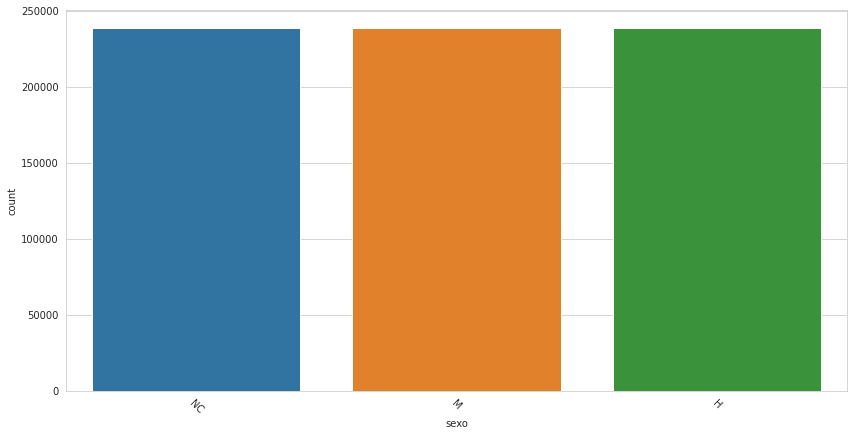

In [ ]:

plt.figure(figsize=(14,7))
sns.countplot(x='sexo', data=data, order=data['sexo'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# Valor medio de número de copias de videojuegos vendidas a nivel mundial

data['Global_Sales'].mean() * 1000000  # Multiplicamos por 1 millón

In [ ]:
# Mediana de las copias de videojuegos vendidas a nivel mundial
# Si ordenamos la lista de valores, la 'mediana' es el valor que queda justo en medio

data['Global_Sales'].median() * 1000000

In [ ]:
# Moda de las copias de videojuegos vendidas a nivel mundial
# La 'moda' es el valor que más se repite

data['Global_Sales'].mode() * 1000000

## Dispersión

In [ ]:

## Diagrama de barras

* Útiles para visualizar distribuciones de valores discretos o categoriales (ej. años, nombres de países, tipos de pantallas de TV, ...)
* Representa gráficamente la comparación entre distintas categorías (ej. para comparar ventas por años)


# ¿Qué año se vendieron más videojuegos?

plt.figure(figsize=(14,7))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=-45)  # Rotamos las etiquetas para que no se solapen
plt.show()

# ¡Un diagrama de barras se puede ordenar!
# Repetimos el diagrama de antes, pero ordenado

plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
# Si además queremos quitar la molesta parte decimal de las etiquetas del eje x...
locs, labels = plt.xticks()
labels = [int(t) for t in data['Year'].value_counts().index]
plt.xticks(locs, labels, rotation=-45)
plt.show()


# Otro ejemplo: ¿qué plataforma tiene más juegos en este ranking?
# Usamos de nuevo la ordenación para que se vea mejor

plt.figure(figsize=(14,7))
sns.countplot(x='Platform', data=data, order=data['Platform'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

# Y ya que estamos, ¿qué género es el más popular?

plt.figure(figsize=(14,7))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

# ¿Y qué compañía ha lanzado más juegos al mercado?
# Usamos 'barplot' en lugar de 'countplot' porque en 'publisher_counts' ya hemos contado cuántos juegos hay por compañía

publisher_counts = data['Publisher'].value_counts()[:20]  # Nos quedamos con los veinte primeros

plt.figure(figsize=(14,7))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=90)  # Rotamos las etiquetas para que no se solapen
plt.show()

# Lo realmente importantes: ¿qué compañía ha vendido más juegos todos estos años?
# Podemos usar 'barplot' de nuevo para eso

publisher_sales = data.groupby(by=['Publisher'])['Global_Sales'].sum()  # Agrupamos ventas por compañía
publisher_sales = publisher_sales.sort_values(ascending=False)[:20]  # Nos quedamos con el Top 20

plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xticks(rotation=90)
plt.show()

## Histograma

* Tipo de gráfico de barras para visualizar distribuciones de valores numéricos
* Indica el número de observaciones que caen dentro de un rango de valores (*bin*)

# ¿Qué año se vendieron más videojuegos?
# Los años se pueden considerar valores discretos, por lo que mejor un diagrama de barras que un histograma, pero bueno

plt.figure(figsize=(14,7))  # Fijamos el tamaño de la figura con Matplotlib
sns.histplot(x='Year', data=data)
plt.show()

# Podemos tener un gráfico apilado donde se distingan los juegos de cada género por año
# Podemos definir el conjunto de contenedores (bins) del eje x
# El parámetro 'hue' permite añadir una dimensión más al gráfico

plt.figure(figsize=(14, 7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], hue='Genre', multiple='stack')
plt.show()

## Diagrama de densidad

* Es una variante del histograma que usa un kernel gaussiano para suavizar los valores
* Ofrecen una mejor visión de la forma de la distribución

# Podemos usar la estimación de densidad de kernel para obtener un gráfico más suavizado
# Ya no hay que preocuparse del número de contenedores (bins)

plt.figure(figsize=(14,7))
sns.kdeplot(data=data, x='Year')
plt.show()

# Podemos superponer el gráfico de densidad al histograma anterior
# Añadimos al 'histplot' el parámetro 'kde=True'

plt.figure(figsize=(14,7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], kde=True)
plt.show()

## Diagrama de líneas

* Útil para visualizar tendencias
* Muy habituales en series temporales (ej. cómo evoluciona el número de habitantes en una ciudad a lo largo de los años)
* Muestra los datos como puntos unidos por líneas rectas


# Comparamos cómo evolucionan las ventas en los distintos países a lo largo de los años

# Nos quedamos con las columnas que nos interesan: año, ventas en USA, en Europa, en Japón y en otros países
year_sales = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Year').sum()

plt.figure(figsize=(14, 7))
sns.lineplot(data=year_sales)
plt.show()

## Diagrama de dispersión

* Útil para identificar relaciones, patrones o tendencias entre dos valores numéricos
* Permite visualizar agrupaciones de datos:
 * Identificar valores extremos (*outliers*)
 * Explorar correlaciones (si un valor implica al otro)
* Recuerda: **¡¡correlación no implica causalidad!!**


# ¿Qué relación hay entre número de lanzamientos y las ventas globales?
# El argumento 'hue' de 'relplot' nos permite expresar una tercera dimensión mediante el color

combined = pd.concat([publisher_counts, publisher_sales], axis=1).dropna()
combined = combined.reset_index()  # El anterior índice se añade como columna con el nombre 'index'
combined = combined.rename(columns={'index': 'Publisher', 'Publisher' : 'Count'})  # Renombramos columnas

sns.relplot(x='Count', y='Global_Sales', hue='Publisher', data=combined, height=7)
plt.show()

## Mapa de calor

* Visualizar datos mediante códigos de colores en dos dimensiones (útil para correlaciones)
* El tono y/o la intensidad indica cómo varían los datos en el espacio


# Visualizamos el nmero de ventas globales para cada una de las plataformas

sales_genre = data[['Platform', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Platform']).sum()
sales_genre = sales_genre.sort_values(by='Global_Sales', ascending=False)[:10]  # Nos quedamos con el Top 10
sales_genre = sales_genre.drop(labels='Global_Sales', axis='columns')  # Quitamos la columna de ventas globales

plt.figure(figsize=(14, 10))
sns.heatmap(sales_genre, annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

# Calculamos la correlación en las ventas de los distintos países
# Un número cerca de 1 implica mucha correlación positiva (si sube uno sube el otro)
# Un número cerca de -1 implica correlación negativa (si sube uno baja el otro)
# Un número cerca de 0 implica que no hay correlación

plt.figure(figsize=(14, 10))
sns.heatmap(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr('spearman'), cmap='Blues', annot=True, linewidth=3)
plt.show()

## Diagrama de caja

* Describe grupos de datos numéricos mediante cuartiles
* Útil para datos que no siguen una distribución normal
* Muestra el resumen de cinco números:
 * Extremo inferior
 * Cuartil inferior (Q1)
 * Mediana
 * Cuartil superior (Q3)
 * Extremo superior

# Primero vamos a calcular para cada año cuántos juegos hay de cada género

data2 = pd.DataFrame(columns=data['Genre'].unique())
for column in data2:
  data2[column] = data[data['Genre'] == column].groupby(by=['Year']).count()['Rank']  # 'Rank' o cualquier otra
data2

# Mostramos la distribución de número de juegos por género a lo largo de los años

plt.figure(figsize=(15, 10))
sns.boxplot(data=data2)
plt.show()

## Diagrama de violín

* Proporciona la información de un diagrama de caja y además la distribución de valores
* Adecuados cuando tenemos muchos valores y no se pueden visualizar individualmente

# Seguimos con la distribución de géneros a lo largo de los años

plt.figure(figsize=(15, 10))
sns.violinplot(data=data2)
plt.show()



In [ ]:
# Valor mínimo de cada columna

data.min()

In [ ]:
# Juego con menos ventas globales
# Con 'argmin' podemos obtener el índice donde está el valor mínimo de una columna

data.iloc[data['Global_Sales'].argmin()]  # 'iloc' localiza un elemento por su índice

Rank                 15983
Name                 Turok
Platform                PC
Year                  2008
Genre               Action
Publisher       Touchstone
NA_Sales                 0
EU_Sales              0.01
JP_Sales                 0
Other_Sales              0
Global_Sales          0.01
Name: 15980, dtype: object

In [ ]:
# Valor máximo de cada columna

data.max()

In [ ]:
# Juego con más ventas en Europa
# Con 'argmax' podemos obtener el índice donde está el valor máximo de cada columna

data.iloc[data['EU_Sales'].argmax()]

In [ ]:
# Rango intercuartílico (IQR) de ventas globales
# Nos indica la 'distancia' que hay enre el 50% de muestras que ocupan el centro de la distribución
# Quitamos el 25% que menos ventas tiene (Q1) y el 25% que más ventas tiene (Q4)

(data['Global_Sales'].quantile(0.75) - data['Global_Sales'].quantile(0.25)) * 1000000

410000.00

In [ ]:
# Desviación estándar de todas las columnas

data.std()

Rank            4791.853933
Year               5.828981
NA_Sales           0.816683
EU_Sales           0.505351
JP_Sales           0.309291
Other_Sales        0.188588
Global_Sales       1.555028
dtype: float64

In [ ]:
iqr=data.quantile(0.75)-data.quantile(0.25)
iqr


Rank            8298.50
Year               7.00
NA_Sales           0.24
EU_Sales           0.11
JP_Sales           0.04
Other_Sales        0.04
Global_Sales       0.41
dtype: float64

# Referencias

* https://cnecovid.isciii.es/covid19/#documentaci%C3%B3n-y-datos
* https://likegeeks.com/es/tutorial-de-python-pandas/